# Simple Regression Model

## Samples Setup

Below are the samples. 

X|Y|
---|---|
2.2|14
2.7|23
3|13
3.55|22
4|15
4.5|20
4.75|28
5.5|23

bhat_0:9.850824800910123, bhat_1:2.622298065984073


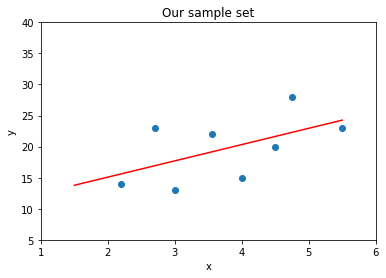

In [31]:
%matplotlib inline
x_i = [2.2, 2.7, 3, 3.55, 4, 4.5, 4.75, 5.5]   # a sample set
y_i = [14, 23, 13, 22, 15, 20, 28, 23] 
# x_i = np.random.normal(2, 1.5, 100)

x_bar = sum(x_i)/len(x_i)
y_bar = sum(y_i)/len(y_i)
num,dem = 0,0
for i, j in zip(x_i, y_i):
    num += (i - x_bar)*(j - y_bar)
    dem += (i - x_bar)**2
bhat_1 = num/dem
bhat_0 = y_bar - bhat_1*x_bar
print('bhat_0:{}, bhat_1:{}'.format(bhat_0, bhat_1))
    

import matplotlib.pyplot as plt
# construct the line
x = np.linspace(1.5, 5.5, 10)
y = 9.85 + 2.62*x
plt.plot(x,y, color='red')
plt.scatter(x_i, y_i)
plt.xlim([1,6])
plt.ylim([5,40])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Our sample set')
plt.show()

So as per formula, we should be getting around, 

$$
y = 9.85 + 2.62x
$$

Let us verify visually via graph below by plotting log likelihood function and taking the maximum point out of that surface directly. 

## Graph Setup

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from math import log, pi

# plotly offline init
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)   # this is needed for plot.ly to operate offline

## Handling data format

The log likelihood function of given sample set $(x_i, y_i)$ of size $m$ is given by, 

$$
ln( L(\beta_0, \beta_1) ) = -\dfrac{m}{2}\big(ln(2\pi\sigma^2)\big) - \dfrac{ \sum_{i=1}^{m}[y_i - (\beta_0 + \beta_1x_i)]^2}{2\sigma^2} 
$$

We need to find out how the surface plot of RHS looks like in above equation as its a $f(\beta_0, \beta_1)$ and others are constants. 

In [3]:
b0 = np.arange(-40,40,0.5)   
b1 = np.arange(-40,40,0.5)   

sigma = 0.5  # assuming but one could try any value

columns = ['b0', 'b1', 'L']
df = pd.DataFrame(columns=columns)

Z = []
for each_b0 in b0:
    for each_b1 in b1:        
        s_1 = sum([ (j - (each_b0 + each_b1*i))**2 for i,j in zip(x_i,y_i) ])  # i and j are x_i and y_i indexings
        L = - (m/2)*log(2*pi*(sigma**2)) - s_1/(2*(sigma**2))
        df.loc[len(df)] = [each_b0, each_b1, L]
        Z.append(L)

Z = np.array(Z).reshape((len(b0),len(b1)))        
df.head()

,b0,b1,L
0,-40.0,-40.0,-742857.806331
1,-40.0,-39.5,-729440.603831
2,-40.0,-39.0,-716146.196331
3,-40.0,-38.5,-702974.583831
4,-40.0,-38.0,-689925.766331


## Plotting the graph

In [24]:
data = [
    go.Surface(
#         z=df.as_matrix()
        x = b0, y = b1, z = Z
    )
]
layout = go.Layout(
    title='Simple Regression Model using MLE',
    scene = dict(xaxis = dict(title='beta_0'),   # latex not supported in plotly 3d plots
                 yaxis = dict(title='beta_1'),),
    autosize=False,
    width=600,
    height=600
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

#### if static export of above image needed..

In [25]:
# exporting fig to image
# https://plot.ly/python/static-image-export/
import os
import plotly.io as pio
filedir = '29_Regression_files'
filename = 'plotly-reg-mle.pdf'
if not os.path.exists(filedir):
    os.mkdir(filedir)
pio.write_image(fig, filedir + '/' + filename)
print('exported successfully')   # eps cannot be viewed, and pdf by iframe has restrictions sometimes by browser

success


## Finding the maximum 

In [5]:
df.loc[df['L'].idxmax()]

b0     10.500000
b1      2.500000
L    -272.743831
Name: 16245, dtype: float64

## Verification

The graph maxes out at around $(\beta_0 = 10.5, \beta_1 = 2.5)$. Thus the regression line should be of the form

$$
y = \beta_0 + \beta_1x = 10.5 + 2.5x
$$

Let us try to plot our sample points and above regression line and see if the line looks good enough. 

exported successfully


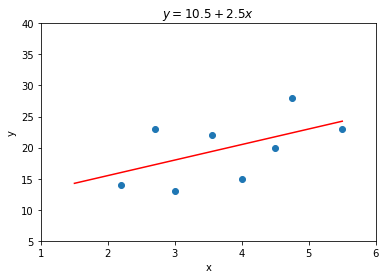

In [27]:
# construct the line
x = np.linspace(1.5, 5.5, 10)
y = 10.5 + 2.5*x

fig, ax = plt.subplots()
ax.scatter(x_i, y_i)
ax.plot(x,y, color='red')
ax.set_xlim([1,6])
ax.set_ylim([5,40])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('$y = 10.5 + 2.5x$')

filename = 'reg-result.pdf'
plt.savefig(filedir + '/' + filename)
print('exported successfully') 
plt.show()

It is indeed, and also closer to our theoretical value we saw earlier, thus proving our approach. 